# TRNG VS PRNG

True random numbers obtained from random.org.

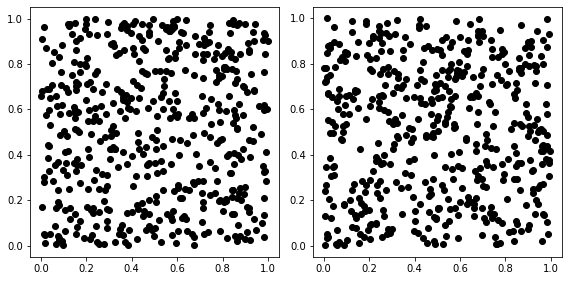

In [1]:
import numpy as np
import matplotlib.pyplot as plt

prng=np.random.random((500,2))
trng=np.loadtxt('truerandom.dat')

fig, ax = plt.subplots(1,2,figsize=(8,8))
ax[0].plot(prng[:,0],prng[:,1],'ko')
ax[0].set_aspect('equal', adjustable='box')
ax[1].plot(trng[:,0],trng[:,1],'ko')
ax[1].set_aspect('equal', adjustable='box')
plt.tight_layout()
#plt.savefig('randomness.png',dpi=150)
plt.show()

# A pRNG: LCG

$x_{k+1}=(a\cdot x_k+b)\%M \quad b<M$

In [2]:
xks=[1]
thetas=[0]
xk=1
for _ in range(16):
    xk=(9*xk+5)%16
    xks.append(xk)
    thetas.append(thetas[-1]+2*np.pi/16)
    print(xk)

14
3
0
5
2
7
4
9
6
11
8
13
10
15
12
1


and visualize...

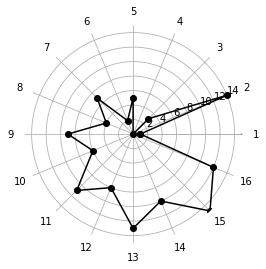

In [3]:
import matplotlib.pyplot as plt
plt.polar(thetas,xks,'ko-')
plt.xticks(thetas,range(1,17))
plt.ylim(0,15)
plt.show()

and animate...

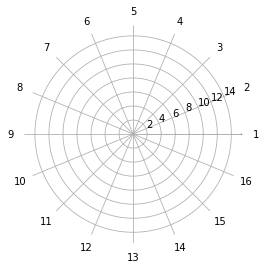

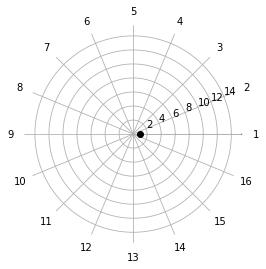

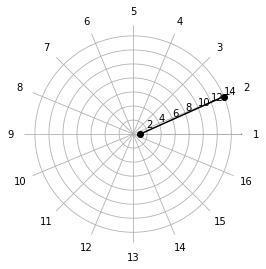

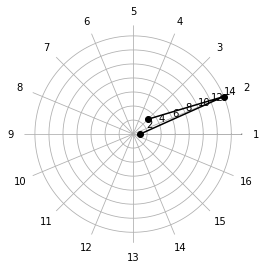

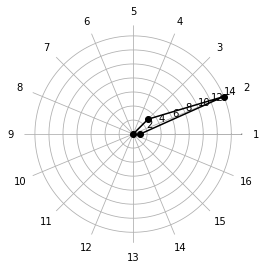

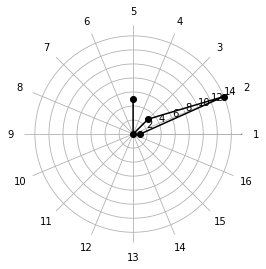

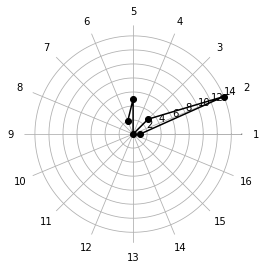

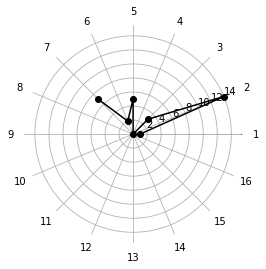

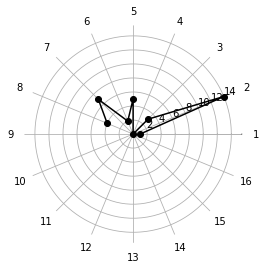

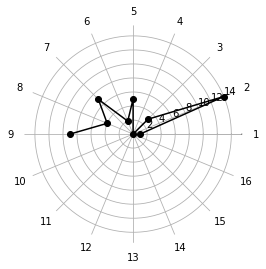

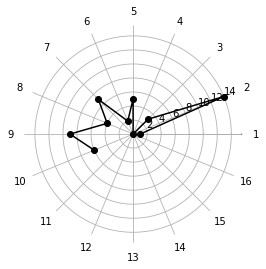

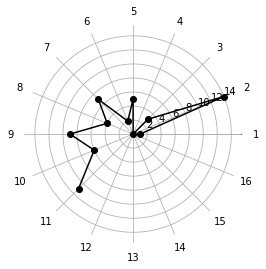

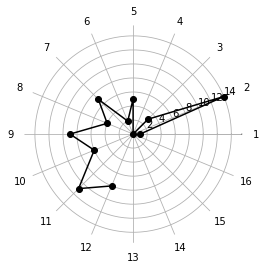

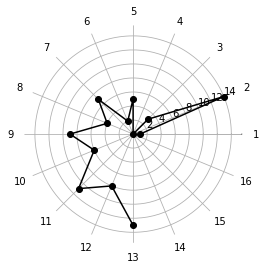

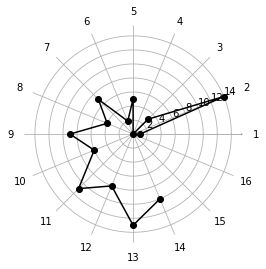

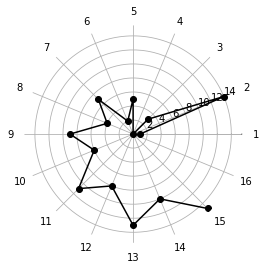

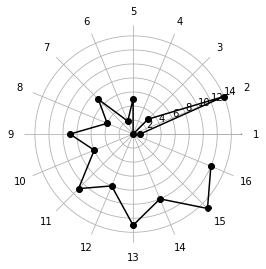

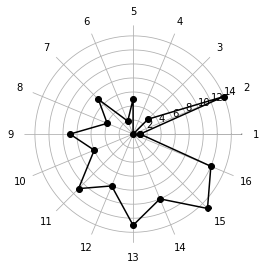

In [4]:
for i in range(len(xks)+1):
    plt.figure()
    plt.polar(thetas[:i],xks[:i],'ko-')
    plt.xticks(thetas,range(1,17))
    plt.ylim(0,15.5)
    #plt.savefig('prng_cycle%03d.png'%i,dpi=150)
    plt.show()

# Testing randomness

Test case is the digits of pi. Two files are used here. Pi.dat is the first 1000001 digits of pi. An other file is used also, which contains the first billion digits, but due to size it is not uploaded. Can be obtained from https://stuff.mit.edu/afs/sipb/contrib/pi/.

First visualize the pi digits. For this, a png image of the pi is used, and the pixels recolored.

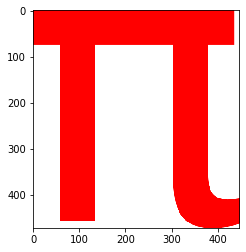

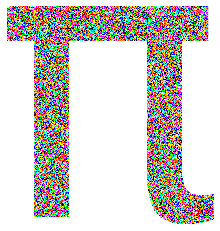

In [5]:
pidatastr=open('pi.dat','r').read()

colors={key:[np.random.random(), np.random.random(), np.random.random()] for key in range(10)}

colors={}
colors[0]=[0,0,0]
colors[1]=[1,1,0]
colors[2]=[1,0,1]
colors[3]=[0,1,1]
colors[4]=[192/255,192/255,192/255]
colors[5]=[1,102/255,0]
colors[6]=[1,0,0]
colors[7]=[0,1,0]
colors[8]=[0,0,1]
colors[9]=[204/255,1,1]



import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
# Read Image 
img = mpimg.imread('random_pi_rect.png') 
plt.figure()
plt.imshow(img) 
plt.show()

k=0
for i,col in enumerate(img):
    for j,pix in enumerate(col):
        if pix[-1]!=0.0:
            col=colors[int(pidatastr[k])]
            img[i,j][0]=col[0]
            img[i,j][1]=col[1]
            img[i,j][2]=col[2]
            k=k+1

plt.figure()
plt.imshow(img) 
plt.xticks([])
plt.yticks([])
plt.gca().set_frame_on(False)
#plt.imsave('randomized_pi_rect.png', img)
plt.show()

Let's make a big array of pi digits

In [6]:
pi=[int(p) for p in pidatastr.strip().split()[0]]
len(pi)

1000001

We will essentially perform $\chi^2$ tests:

$\chi^2=\sum_i\frac{(N_i-Np_i)^2}{Np_i}$

# Frequency test

Check whether the occurence of digits is uniform.

For N=1e6 it doesn't seem so probable that the distribution of digits is uniform. If we take the fequencies for N=1e7 from literature, it looks more like it.

In [7]:
counts=np.unique(pi,return_counts=True)
counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 99959,  99758, 100026, 100230, 100230, 100359,  99548,  99800,
         99985, 100106]))

In [8]:
from scipy.stats import chisquare

chisquare(counts[1],[sum(counts[1])*0.1]*10)

Power_divergenceResult(statistic=5.5136634863365135, pvalue=0.7874318862396316)

Below is the same with pure python, no numpy or scipy.

In [9]:
counts=np.zeros(10)
for p in pi:
    counts[p]+=1
    
probi=0.1
chisquared=0.0
N=sum(counts)
for Ni in counts:
    chisquared+=(Ni-N*probi)**2/(N*probi)
print(chisquared)

5.513663486336513


Literature counts and chi-squared for N=1e7 (from: https://blogs.sas.com/content/iml/2015/03/12/digits-of-pi.html)

In [10]:
counts=[999440,999333,1000306,999964,1001093,1000466,999337,1000207,999814,1000040]
chisquare(counts,[sum(counts)*0.1]*10)

Power_divergenceResult(statistic=2.78384, pvalue=0.9722519536917961)

# Serial test

we check the distribution of digits following a given digit.

In [11]:
chis=[]
probs=[]
sums=0.0
for i in range(10):
    counts=[0.0]*10
    print(i,' is being processed')
    for j,p in enumerate(pi):
        if p==i and j<len(pi)-1:
            counts[pi[j+1]]+=1
    print(counts)
    print(sum(counts))
    sums+=sum(counts)
    chis.append(chisquare(counts,[sum(counts)*0.1]*10).statistic)
    probs.append(chisquare(counts,[sum(counts)*0.1]*10).pvalue)

0  is being processed
[9938.0, 9891.0, 10048.0, 10038.0, 9948.0, 10042.0, 9896.0, 9951.0, 10173.0, 10034.0]
99959.0
1  is being processed
[10006.0, 10064.0, 9721.0, 10012.0, 9875.0, 9992.0, 9934.0, 9944.0, 10061.0, 10148.0]
99757.0
2  is being processed
[9905.0, 10110.0, 10062.0, 9951.0, 10060.0, 9989.0, 9858.0, 10224.0, 9955.0, 9912.0]
100026.0
3  is being processed
[10051.0, 9939.0, 10055.0, 10026.0, 9960.0, 10188.0, 9925.0, 10098.0, 9951.0, 10037.0]
100230.0
4  is being processed
[10017.0, 10010.0, 9980.0, 10009.0, 9958.0, 10035.0, 10193.0, 10043.0, 9914.0, 10071.0]
100230.0
5  is being processed
[10066.0, 9791.0, 10055.0, 10050.0, 10194.0, 10232.0, 10010.0, 10045.0, 9918.0, 9998.0]
100359.0
6  is being processed
[10147.0, 9896.0, 10085.0, 9974.0, 10014.0, 9981.0, 9819.0, 9867.0, 9880.0, 9885.0]
99548.0
7  is being processed
[9886.0, 10095.0, 9962.0, 10069.0, 10022.0, 9963.0, 10112.0, 9801.0, 9991.0, 9899.0]
99800.0
8  is being processed
[10029.0, 9954.0, 10073.0, 10047.0, 9960.0, 9

In [12]:
chis

[6.81028221570844,
 12.53226340006215,
 11.110351308659748,
 6.053676543948917,
 4.998902524194353,
 14.048256758237923,
 9.897496685016272,
 8.868336673346693,
 3.562584387658149,
 10.818372525123369]

In [13]:
probs

[0.6568642028656573,
 0.18493767883208498,
 0.2682207230601513,
 0.7345343211571833,
 0.8344039194183701,
 0.12061896652640076,
 0.35884706352502427,
 0.4495156981686198,
 0.9377781984483733,
 0.28836438316667484]

# 1billion digits

we repeat the same for more digits.

In [14]:
pidatastr=open('pi-billion.txt','r').read()

In [15]:
pi=[int(p) for p in pidatastr[2:100000002].strip().split()[0]]

In [16]:
counts=np.unique(pi,return_counts=True)
counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 9999922, 10002475, 10001092,  9998442, 10003863,  9993478,
         9999417,  9999610, 10002180,  9999521]))

In [17]:
from scipy.stats import chisquare

chisquare(counts[1],[sum(counts[1])*0.1]*10)

Power_divergenceResult(statistic=7.268462000000001, pvalue=0.6091907198024512)

Looks bad again:)

In [18]:
chis=[]
probs=[]
sums=0.0
for i in range(10):
    counts=[0.0]*10
    print(i,' is being processed')
    for j,p in enumerate(pi):
        if p==i and j<len(pi)-1:
            counts[pi[j+1]]+=1
    print(counts)
    print(sum(counts))
    sums+=sum(counts)
    chis.append(chisquare(counts,[sum(counts)*0.1]*10).statistic)
    probs.append(chisquare(counts,[sum(counts)*0.1]*10).pvalue)

0  is being processed
[999781.0, 1000793.0, 1000241.0, 1000808.0, 1001098.0, 1000103.0, 998571.0, 997874.0, 1002087.0, 998566.0]
9999922.0
1  is being processed
[1001122.0, 1000611.0, 1000072.0, 1000607.0, 999921.0, 998868.0, 1000340.0, 1000820.0, 1000343.0, 999771.0]
10002475.0
2  is being processed
[1000400.0, 1000014.0, 1001323.0, 999186.0, 1000260.0, 999423.0, 1000575.0, 999125.0, 1000556.0, 1000229.0]
10001091.0
3  is being processed
[1000333.0, 999221.0, 1000749.0, 998736.0, 999972.0, 1000324.0, 998810.0, 998986.0, 1000484.0, 1000827.0]
9998442.0
4  is being processed
[1000944.0, 1002842.0, 1000762.0, 998882.0, 999450.0, 999194.0, 1000411.0, 1000369.0, 999908.0, 1001101.0]
10003863.0
5  is being processed
[998728.0, 999466.0, 998972.0, 999097.0, 999164.0, 999201.0, 999015.0, 1001677.0, 998744.0, 999414.0]
9993478.0
6  is being processed
[1001006.0, 998960.0, 1001851.0, 999703.0, 999753.0, 998875.0, 999609.0, 999931.0, 999647.0, 1000082.0]
9999417.0
7  is being processed
[999012.0

In [19]:
probs

[0.0762502711103017,
 0.9335774425288709,
 0.8897058355786276,
 0.7295788537306299,
 0.22601423501835213,
 0.6821254293944936,
 0.6173361668070945,
 0.486046921973332,
 0.09574903036496958,
 0.8849207021671719]